In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_df, clinical_df, how='outer', on='Mouse ID')


# Display the data table for preview
combined_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_df = combined_df.groupby(["Drug", "Timepoint"])
mean_tumor_vol = group_df["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
means = pd.DataFrame(mean_tumor_vol).reset_index()

# Preview DataFrame
means.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_errors = group_df["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
se = pd.DataFrame(standard_errors).reset_index()

# Preview DataFrame
se.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
pivot = means.pivot(index = "Timepoint", 
           columns = "Drug",
           values = "Tumor Volume (mm3)")

# Preview that Reformatting worked
pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Text(0, 0.5, 'Tumor Volume (mm3)')

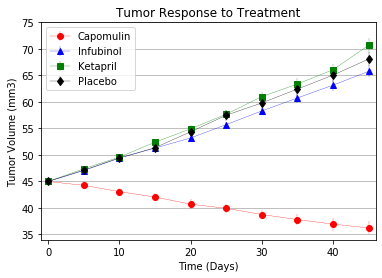

In [5]:
# Generate the Plot (with Error Bars)

# Set x axis as the indexes in the pivot table (Timepoints)
x_axis = pivot.index
x_axis

# Define colors and markers for the lines in the graph and put lines in the same plot
marker = ["o", "^", "s", "d"]
color = ["red", "blue", "green", "black"]
fig, ax = plt.subplots()

# Only plot tumor response to the following four drugs
drugs_to_show = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

for drug in drugs_to_show:
    ax.errorbar(x_axis, pivot[drug], standard_errors[drug], 
                color = color[drugs_to_show.index(drug)], marker=marker[drugs_to_show.index(drug)], 
               linewidth=0.3)

# Add legend, x and y axis limits, horizontal grids, title, and x and y axis labels
ax.legend(drugs_to_show)
ax.set_xlim(-1, max(x_axis) + 1)
ax.set_ylim(34, 75)
ax.yaxis.grid()
ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")

In [6]:
# Save the Figure
fig.savefig("Images/tumor_response_to_treatment.png")

# Show the Figure
fig.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site = group_df["Metastatic Sites"].mean()

# Convert to DataFrame
met_site_df = pd.DataFrame(met_site).reset_index()

# Preview DataFrame
met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
se = group_df["Metastatic Sites"].sem()

# Convert to DataFrame
se_df = pd.DataFrame(se).reset_index()

# Preview DataFrame
se_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
pivot_met = met_site_df.pivot(index = "Timepoint", 
           columns = "Drug",
           values = "Metastatic Sites")

# Preview that Reformatting worked
pivot_met.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


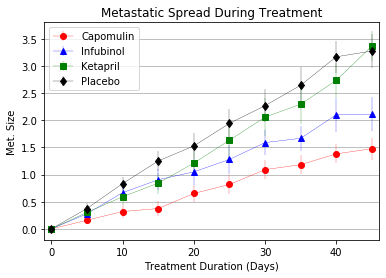

In [10]:
# Generate the Plot (with Error Bars)

# Set x axis as the indexes in the pivot table (Timepoints)
x_axis = pivot_met.index
x_axis

fig, ax = plt.subplots()

# Plot tumor spread for the selected four drugs
for drug in drugs_to_show:
    ax.errorbar(x_axis, pivot_met[drug], se[drug], 
                color = color[drugs_to_show.index(drug)], marker=marker[drugs_to_show.index(drug)], 
               linewidth=0.3)

# # # Add legend, x and y axis limits, horizontal grids, title, and x and y axis labels
ax.legend(drugs_to_show)
ax.set_xlim(-1, max(x_axis) + 1)
ax.set_ylim(-0.2,3.8)
ax.yaxis.grid()
ax.set_title("Metastatic Spread During Treatment")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Size")

# Save the Figure
fig.savefig("Images/met_size_to_treatment.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = group_df["Mouse ID"].count()

# Convert to DataFrame
mouse_count = pd.DataFrame(mouse_count).reset_index()

# Preview DataFrame
mouse_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
mouse_pivot = mouse_count.pivot(index="Timepoint",
                               columns="Drug",
                               values="Mouse ID")
# Preview the Data Frame
mouse_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


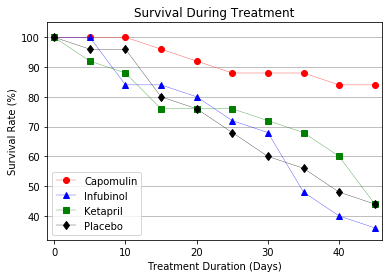

In [13]:
# Generate the Plot (Accounting for percentages)
survival_rate = pd.DataFrame(index=mouse_pivot.index, columns=drugs_to_show)

for drug in drugs_to_show:
    survival_rate[drug] = mouse_pivot[drug] / mouse_pivot[drug][0] *100

survival_rate.head()

# Set x axis as the indexes in the pivot table (Timepoints)
x_axis = mouse_pivot.index
x_axis

fig, ax = plt.subplots()

# Plot tumor spread for the selected four drugs
for drug in drugs_to_show:
    ax.plot(x_axis, survival_rate[drug], 
                color = color[drugs_to_show.index(drug)], marker=marker[drugs_to_show.index(drug)], 
               linewidth=0.3)

# Add legend, x and y axis limits, horizontal grids, title, and x and y axis labels
ax.legend(drugs_to_show)
ax.set_xlim(-1, max(x_axis) + 1)
ax.set_ylim(32,105)
ax.yaxis.grid()
ax.set_title("Survival During Treatment")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Survival Rate (%)")

# Save the Figure
fig.savefig("Images/survival_rate.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
percent_change = []
for drug in drugs_to_show:
    percent_change.append((pivot[drug][45] - pivot[drug][0])
                          /(pivot[drug][0])* 100) 

percent_change = pd.DataFrame(percent_change, drugs_to_show).reset_index()
percent_change.columns = ["Drugs", "Percent Change"]

# Display the data to confirm
percent_change

,Drugs,Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


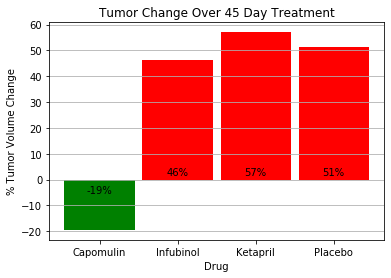

In [182]:
# Store all Relevant Percent Changes into a Tuple
percent_tuple = (percent_change["Drugs"], percent_change["Percent Change"])
percent_tuple[1][0]

# Splice the data between passing and failing drugs
percent_negative = (percent_tuple[0][0], percent_tuple[1][0])
percent_positive = (percent_tuple[0][1:], percent_tuple[1][1:])

# Plot bars: negative as green and positive as red
fig, ax = plt.subplots()
negative_bar = ax.bar(percent_negative[0], percent_negative[1], color="green", width=0.9)
positive_bar = ax.bar(percent_positive[0], percent_positive[1], color="red", width=0.9)

# Orient widths. Add labels, tick marks, etc. 
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xlabel('Drug')
ax.set_ylabel('% Tumor Volume Change')
ax.yaxis.grid()

# Use functions to label the percentages of changes
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0: # arbitrary; 95% looked good to me.
            label_position = 1
        else:
            label_position = -6

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                f"{int(height)}%",
                ha='center', va='bottom')

# Call functions to implement the function calls
autolabel(negative_bar, ax)
autolabel(positive_bar, ax)

# Save the Figure
fig.savefig("Images/tumor_change.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)